# CS199 Spring 2023
# Report 1: Descriptive Statistics and Ziph's Law

In this report, I will explain how I used our dataset to generate data visualizations of Ziph's Law and the Long Tail Phenomena.

### Table of Contents

1. <a href="#section1">Reading the data</a>
1. <a href="#section2">Normalizing the data</a>
1. <a href="#section3">Calculating the Frequency</a>
1. <a href="#section4">Ziph's Law for Content Words</a>

<a id='section1'></a>
## Reading the data

First, I am iterating through all the meditations folders and compiling their text into one corpus. The dataset consists of approximately 400 transcripts generated from guided meditation videos on YouTube. These data have been split into separate folders based on category, of which we have four: Anxiety, Learning and Growth, Sleep, and Morning Meditations. The transcripts range in punctuation and capitalization. This is because certain transcripts are manually uploaded by the video creators and all others are compiled from auto-generated captions. The transcripts are also of variable length.

In [51]:
import nltk
import glob
import os
folderpaths = ['../AnxietyMeditations/', '../SleepMeditations/', '../LearningAndGrowthMeditations/', '../MorningMeditations/']

all_text = ''
for folder in folderpaths:
    for doc in glob.glob(os.path.join(folder, '*.txt')):
        with open(doc, 'r') as f:
            text = f.read()
            all_text += text

print(len(all_text.split()))
print(len(all_text))

651749
3528962


As the output has shown, this corpus contains 651,749 words and 3,528,962 characters overall, which have been compiled by this code into a string named ```all_text```.

<a id='section2'></a>
## Normalizing the Data

Next, I am normalizing the corpus by 1) converting all words to lower case and 2) removing punctuation from the ```all_text``` string. In order to remove punctuation, I have to be careful because I only want to remove the punctuation that signifies sentence or phrasal ends i.e. comma, period, exclamation mark while keeping apostrophes and other word markings. To achieve this, I am using regular expressions.

In [52]:
import re

# %% Remove punctuation 
all_text = re.sub(r"[^\w\d'\s]+",'',all_text)
print(len(all_text.split()))
print(len(all_text))

# %% Convert to lower case
all_text = all_text.split()
all_text = [word.lower() for word in all_text if word.isalpha()]
# print(all_text)


651586
3495308


<a id='section3'></a>
## Calculating the Frequency

I store the data into a dictionary named ```frequencies``` which maps each distinct word to its frequency in the corpus. I then store this data into a dataframe and sort the items. 

In [53]:

import pandas as pd
from operator import itemgetter
frequencies = {}

# %% Calculate the frequency of the words inside
for word in all_text :
    count = frequencies.get(word , 0)
    frequencies[ word ] = count + 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequencies.items(), key=itemgetter(1), reverse = True)

rank = 1
print(len(frequencies))

10277


As the results have shown, there are 10,277 distinct words in the corpus. 

In [54]:
# %%Creating a table for frequency * rank

for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1
    
print (df)

               Rank  Frequency  Frequency * Rank
and               1      26886             26886
the               2      24753             49506
to                3      24489             73467
you               4      23349             93396
your              5      21496            107480
...             ...        ...               ...
unaccepting   10273          1             10273
attaining     10274          1             10274
scalar        10275          1             10275
unattainable  10276          1             10276
yana          10277          1             10277

[10277 rows x 3 columns]


I have compiled a table visualization along with their rank, frequency, and frequency * rank.

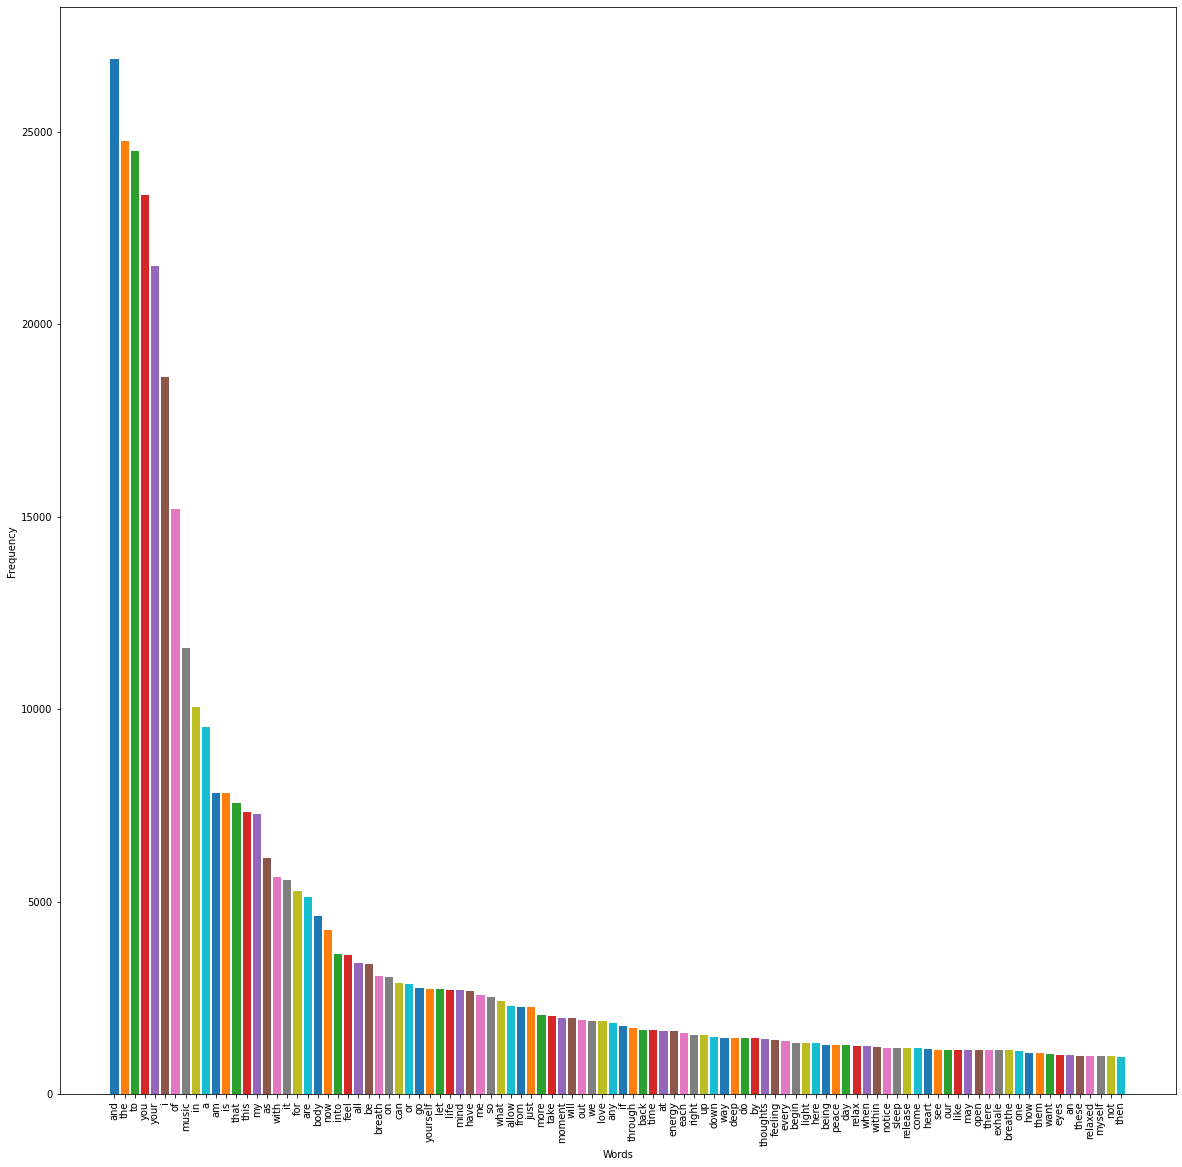

In [55]:
from matplotlib import pyplot as plt

# %% Python visualization with pyplot
plt.figure(figsize=(20,20))  #to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in collection[:100]:
    plt.bar(word, freq)    
plt.show()
# %% End of the program

This is the visualization of Ziph's Law for our corpus from the 100 most frequent words, including stopwords. 

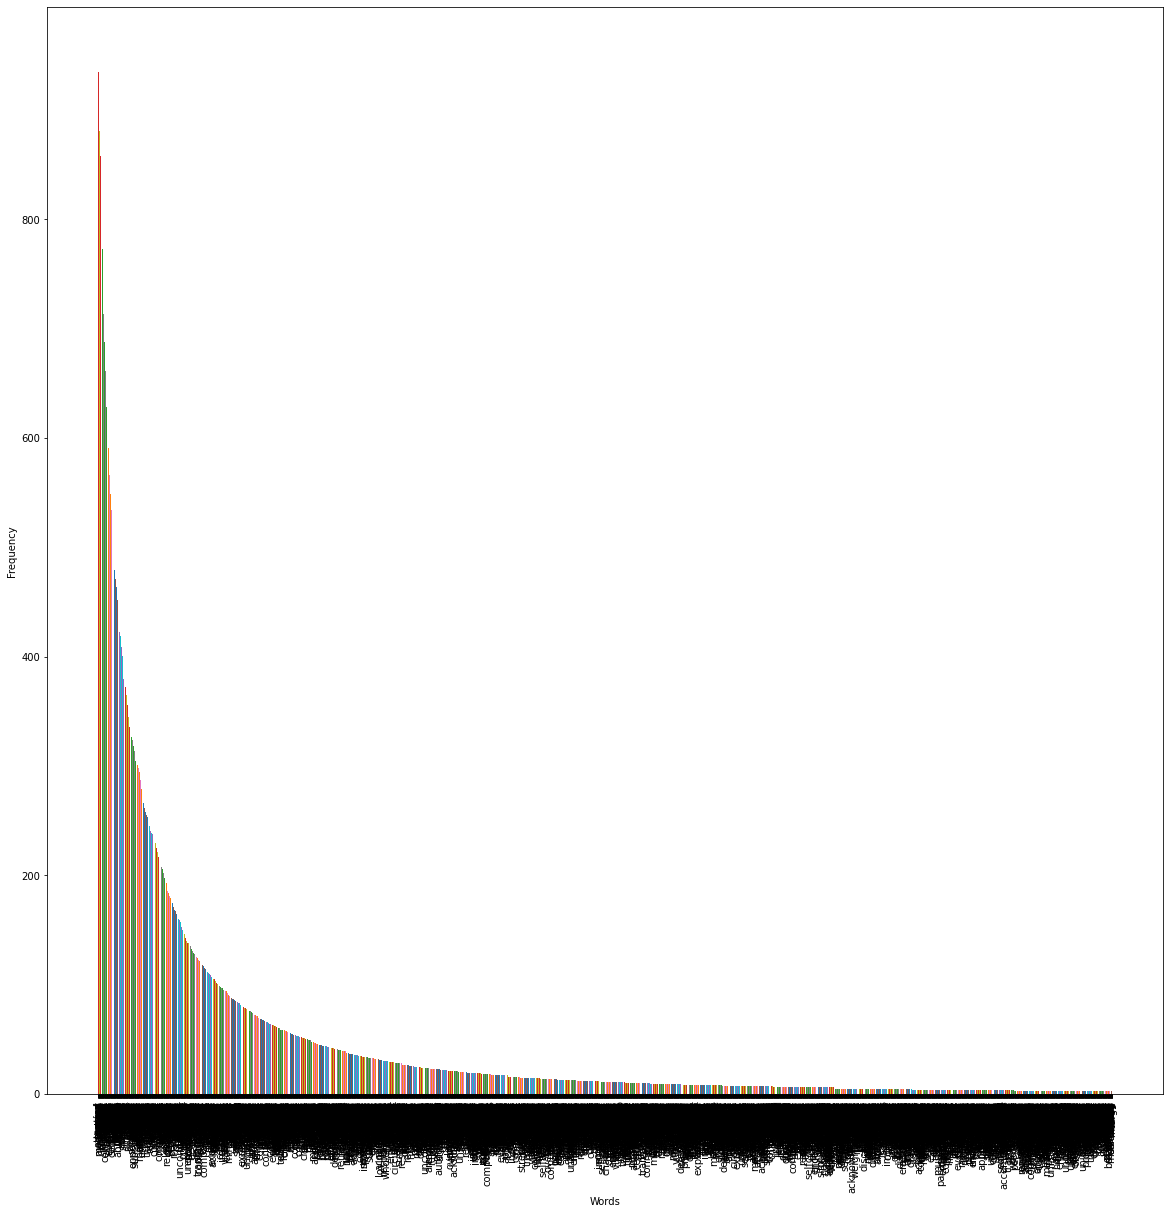

In [56]:
from matplotlib import pyplot as plt

# %% Python visualization with pyplot
plt.figure(figsize=(20,20))  #to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in collection[100:5000]:
    plt.bar(word, freq)    
plt.show()
# %% End of the program

This is the visualization of the 101st to 1000th most frequenct words, which also follows Ziph's law. For a list of the words for better visualization, see below.

<a id='section4'></a>
## Ziph's Law for Content Words

I'm repeating the process for content words by removing stopwords from the original corpus.

In [67]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# %% Remove stop words
content_text = all_text
content_text = [word for word in content_text if word not in stop_words]

# also remove music 
content_text.remove('music')
print(len(content_text))

311952


There are 311,953 content words in ```content_text``` as opposed to 651,586 total words. 

In [68]:
# %% Calculate the frequency of the words inside
frequency = {}
for word in content_text :
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

In [69]:
# %%Creating a table for frequency * rank

for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1
    
print (df)

               Rank  Frequency  Frequency * Rank
music             1      11586             11586
body              2       4642              9284
feel              3       3611             10833
breath            4       3069             12276
go                5       2770             13850
...             ...        ...               ...
unaccepting   10143          1             10143
attaining     10144          1             10144
scalar        10145          1             10145
unattainable  10146          1             10146
yana          10147          1             10147

[10147 rows x 3 columns]


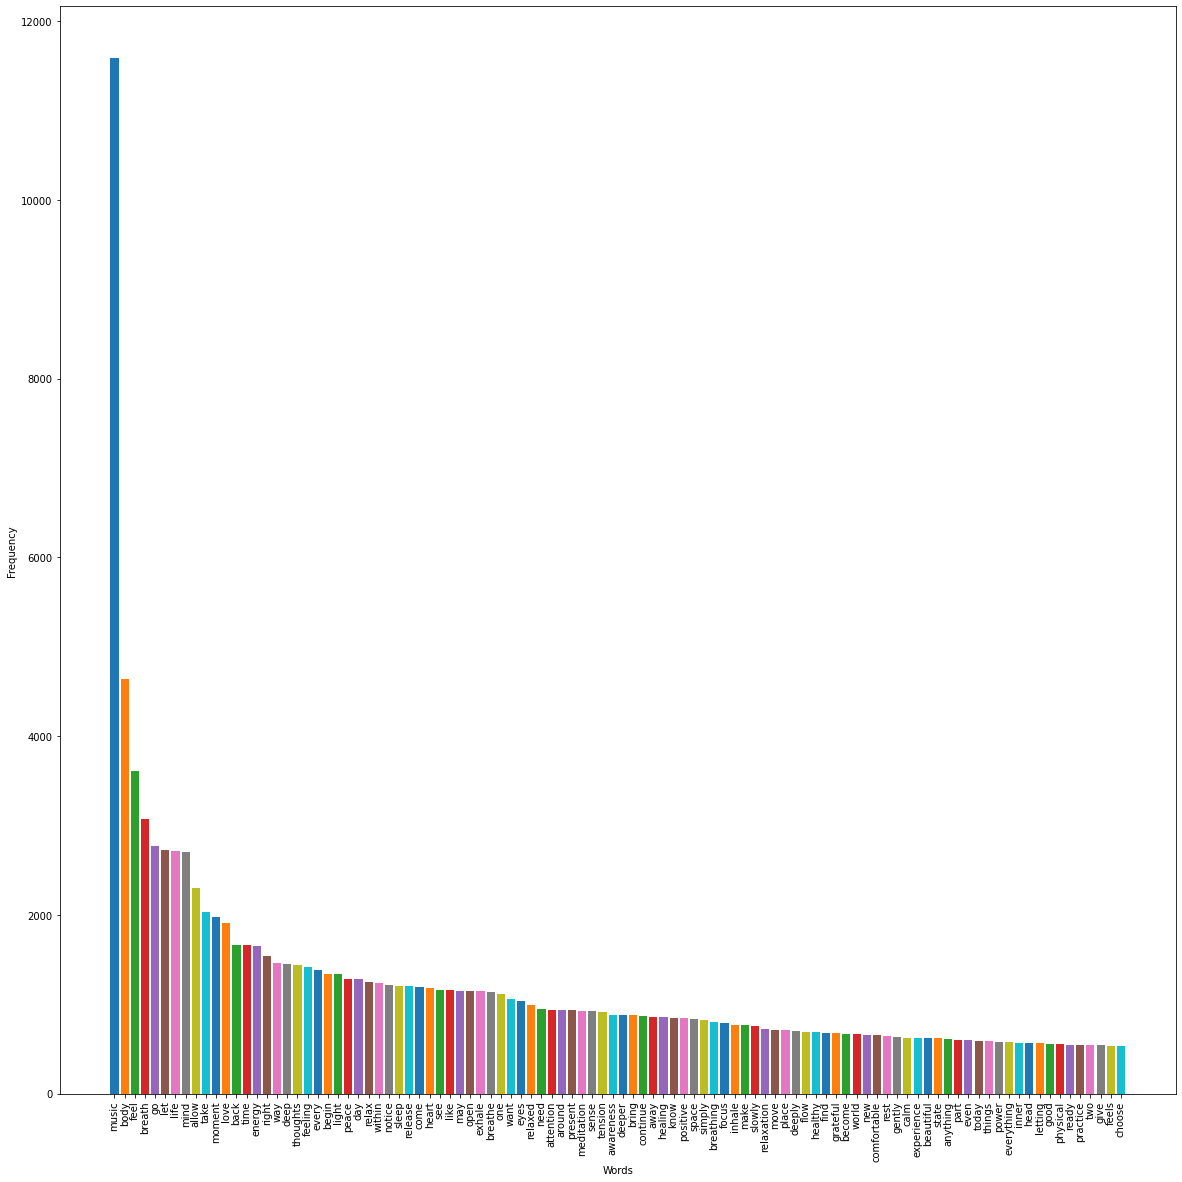

In [65]:
# %% Python visualization with pyplot
plt.figure(figsize=(20,20))  #to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in collection[:100]:
    plt.bar(word, freq)    
plt.show()
# %% End of the program